#Business Understanding

In [ ]:
#Carga de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Integrantes:
* Alejandro Patricio Rivera Quezada
* Ignacio Andres Geldres Rivera

Preguntas:

1.- ¿La Temperatura a variado tras los años?

2.- ¿Que mes es el mas lluvioso?

3.- ¿Importa la temperatura al momento de llover?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Creación del dataframe con la data entregada

clima_data = pd.read_csv("/content/drive/MyDrive/Minería de datos /Semestrl/weatherAUS.csv")
clima_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No



Contexto



En la oficina meteorológica de la Commonwealth de Australia nos proporciona un dataframe el cual nos entrega información de distintos datos relacionados al clima, algunos de estos son:



* MinTemp y MaxTemp la cual nos da la temperatura máxima y mínima en grados Celsius



* WindGustDir y WindGustSpeed este nos da la dirección y la velocidad de la ráfaga más fuerte en 24 horas



* WindDir9am y WindDir3pm este nos entrega la dirección del viento a las 9 pm y a las 3 pm



* Vel9am y Vel3pm este nos entrega la velocidad del viento en km/hr a las 9 am y a las 3 pm



* Humidity9am y Humidity3pm Este nos entrega la información del porcentaje de humedad a las 9 am y 3 pm



* Pressure9am y Pressure3pm este nos entrega la presión atmosférica (hpa) a nivel del mar a las 9 am y 3 pm



* Cloud9am y Cloud3pm este nos entrega la información de la fracción del cielo cubierto por nubes en el cual un valor 0 nos indica que el cielo está totalmente despejados y 8 si está totalmente cubierto a las 9 am y 3 pm






de cada una de las distintas localizaciones de Australia la cual está dividida en seis estados (New South Wales, Victoria, Queensland, South Australia, Western

Australia y Tasmania) y dos territorios continentales (Northern Territory y Australian Capital Territory En cada uno de estos puede varias mucho los climas debido a las zonas en las cuales estan ubicados se puede tener divercidad climatica por lo cual nos podemos encontrar con distintos fenemonos naturales extremos como sequias, inundaciones, ciclones tropicales, vendavales, incendios forestales y tornados.



Y entre otras, pero estas variables nos pueden ayudar a nuestra variable objetivo la cual es "RainTomorrow" esta nos dará la información si va a llover o no dependiendo de las variables ya mencionadas.


In [ ]:
clima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Usaremos el comando .info() en el dataframe para saber que tipo de datos son nuestras variables y poder lograr un mejor análisis.

Contamos con 142.192 datos en 24 columnas que nos ofrece este dataset el cual se encuentra dividido en un total de 17 columnas tipo float64 lo cual es el 70% de la data y 7 datos tipo object que es 30% de la información.

En nuestra data object tenemos datos que se basan en el clima, tiempo, direcciones y locación en cambio en nuestra muestra float se basa en datos atmosféricos.

#Data understanding

In [ ]:
clima_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


* Evaporation: Esta variable nos entrega la información de la evaporación en mm
de las 24 horas, teniendo como promedio una evaporación de 5.4, también podemos ver que existe un dato que salen de lo común teniendo como mayor variable el dato que se encuentra en el 145 aproximadamente.

* Sunshine: Esta variable nos entrega la información de la cantidad de luz del sol registrada ese día, teniendo una media de 7 horas de luz por día, no se encuentran datos atipicos ya que depende de la estación del año la luz que da el sol siendo la mayor en verano con 14.5 horas de luz.

* Cloud9am: Esta variable nos entrega la información de la cantidad de nubes en el cielo a las 9 am teniendo 0 como cielo totalmente descubierto y 9 si está totalmente cubierto, teniendo un promedio de 4.4 osea un 50% de nubes cubriendo el cielo y también podemos ver que no existen datos  atípicos.

* Cloud3pm: Esta variable non entrega la información de la cantidad de nubes en el cielo a las 3 pm teniendo 0 como cielo totalmente descubierto y 9 si está totalmente cubierto, teniendo un promedio de 4.5 y también podemos ver que no existen datos atípicos.

* Rainfall: Esta variable nos entrega la información de la cantidad de lluvia registrada ese día en mm, teniendo como promedio 2.3 mm y podemos prever la existencia de muchos datos atípicos teniendo como máximo 371 mm.

Con esta información también podemos llegar a interpretar que en sí Australia tiene bastantes horas de luz durante año y no demasiadas nubes,también podemos apreciar que en sí es común que se registren lluvias, pero registrando pocos mm, por lo cual podríamos decir que es un país cálido.

In [ ]:
clima_data_graficos = clima_data
clima_data_graficos['Date'] = pd.to_datetime(clima_data_graficos['Date'])
clima_data_graficos['Anio'] = clima_data_graficos['Date'].dt.year
clima_data_graficos['Mes'] = clima_data_graficos['Date'].dt.month
def month(x):
    return calendar.month_name[int(x)]

clima_data_graficos['Mes'] = clima_data_graficos.Mes.apply(month)
clima_data_graficos = clima_data_graficos.set_index('Date')




<ipython-input-7-6c9aa968a3ff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a =clima_data_graficos["Rainfall"], kde=True, rug=True)


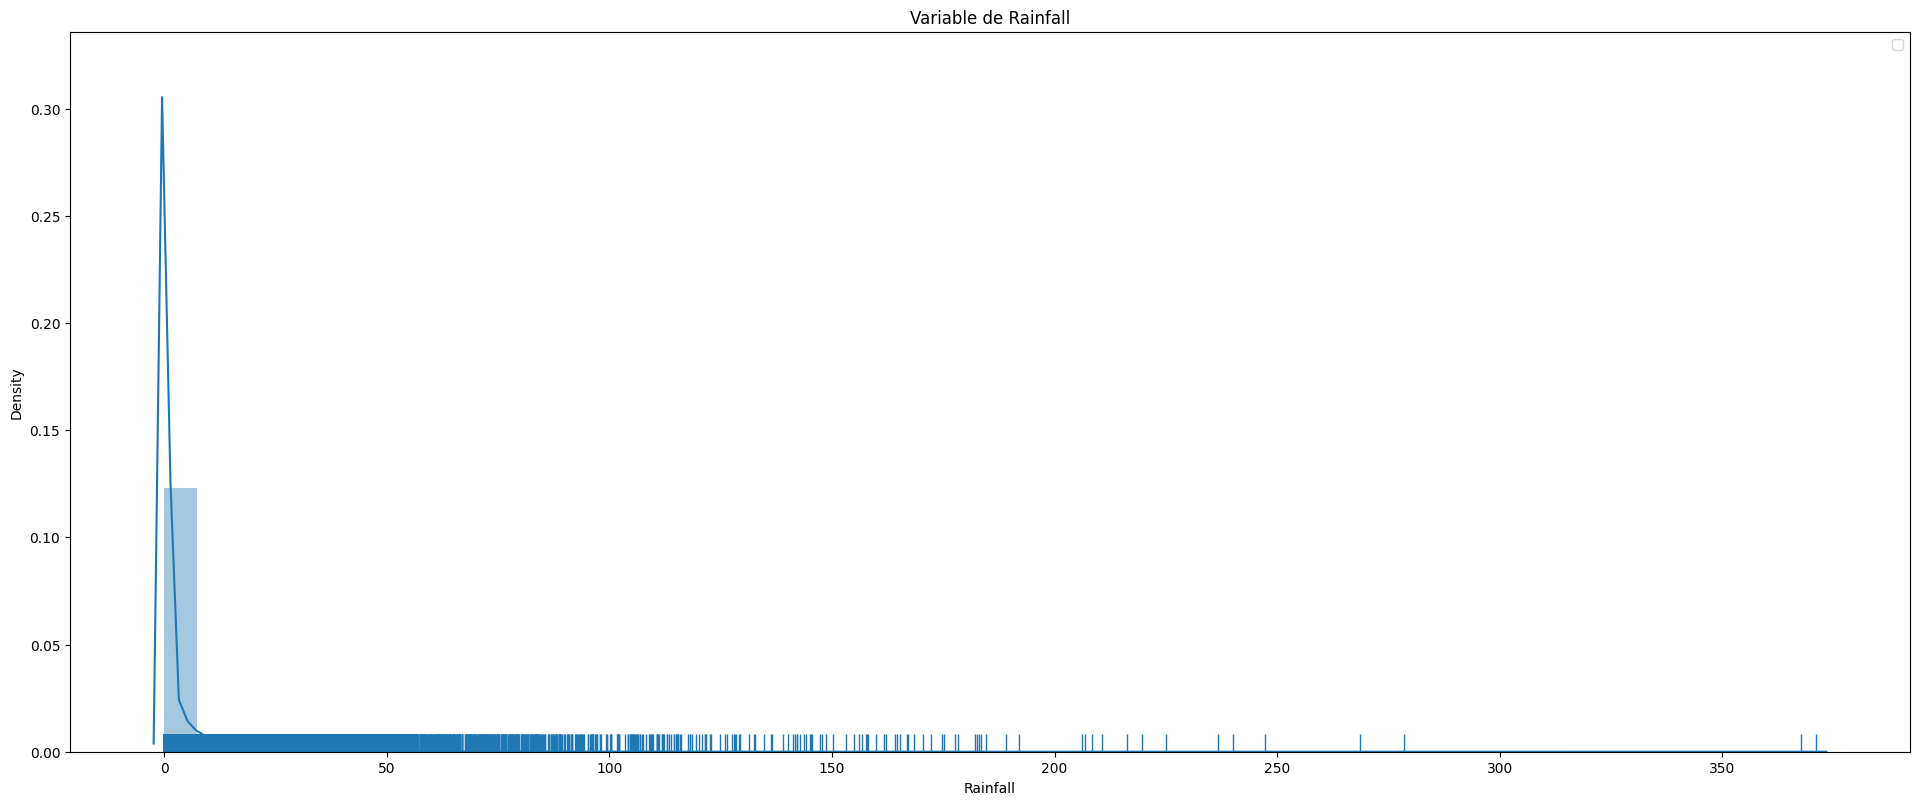

In [ ]:
plt.subplot()
plt.title('Variable de Rainfall')
sns.distplot( a =clima_data_graficos["Rainfall"], kde=True, rug=True)
plt.legend()


plt.subplots_adjust(left=0.125,
                    bottom=0.5,
                    right=3,
                    top=2,
                    wspace=0.2,
                    hspace=0.35)

Gracias al gráfico anterior podemos saber que se trata de una distribución de asimétrica positiva, ya que se registran valores muy diferentes debido a los datos asimetricos y a la cantidad de diferentes variables que se registran en la data, también tenemos que la media es mayor que la mediana, pero no siempre pasa esto en este tipo de distribución.

<ipython-input-8-50ba2d1d28d1>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(clima_data_graficos["Evaporation"], shade=True, bw=0.5)
<ipython-input-8-50ba2d1d28d1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clima_data_graficos["Evaporation"], shade=True, bw=0.5)
<ipython-input-8-50ba2d1d28d1>:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(clima_data_graficos["MinTemp"], shade=True, bw=0.5)
<ipython-input-8-50ba2d1d28d1>:8: FutureWarning: 

`shade` is now deprecated

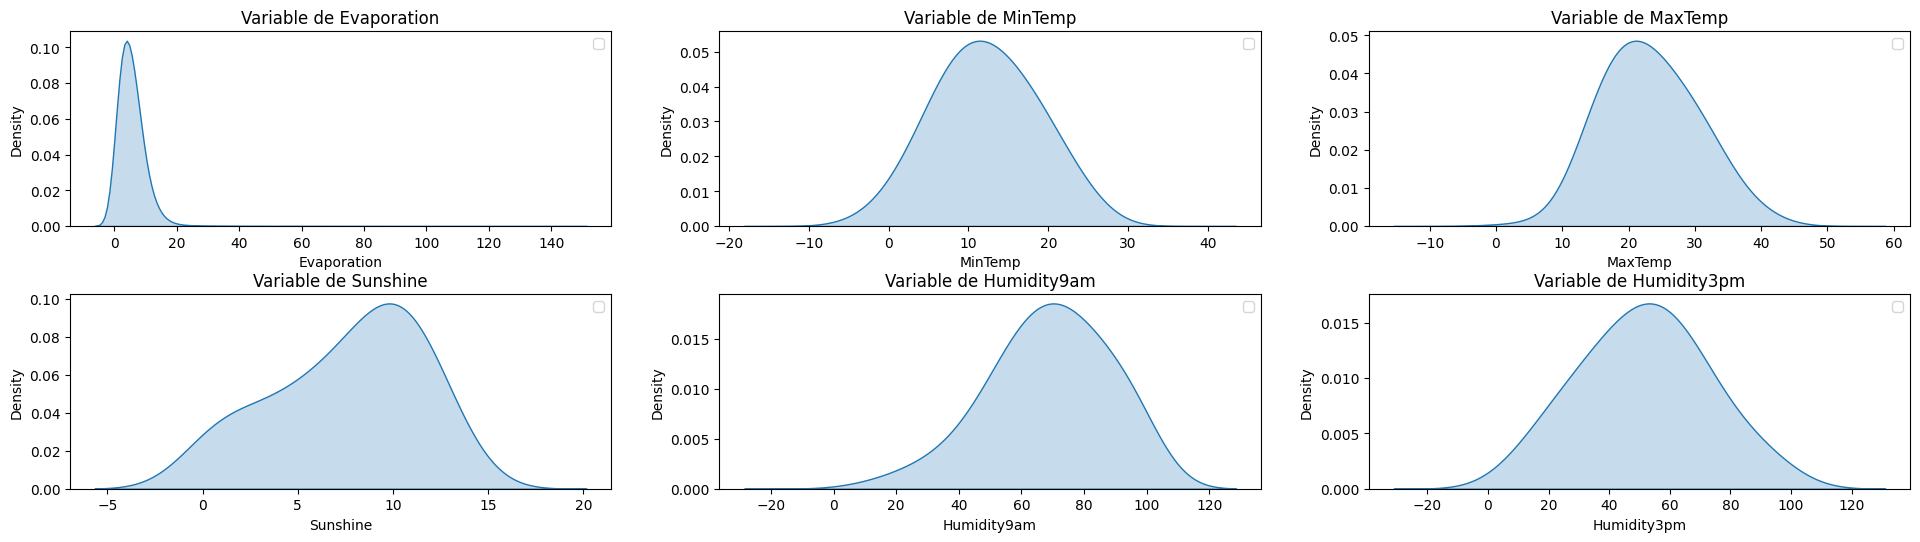

In [ ]:
plt.subplot(331)
plt.title('Variable de Evaporation')
sns.kdeplot(clima_data_graficos["Evaporation"], shade=True, bw=0.5)
plt.legend()

plt.subplot(332)
plt.title('Variable de MinTemp')
sns.kdeplot(clima_data_graficos["MinTemp"], shade=True, bw=0.5)
plt.legend()

plt.subplot(333)
plt.title('Variable de MaxTemp')
sns.kdeplot(clima_data_graficos["MaxTemp"], shade=True, bw=0.5)
plt.legend()

plt.subplot(334)
plt.title('Variable de Sunshine')
sns.kdeplot(clima_data_graficos["Sunshine"], shade=True, bw=0.5)
plt.legend()

plt.subplot(335)
plt.title('Variable de Humidity9am')
sns.kdeplot(clima_data_graficos["Humidity9am"], shade=True, bw=0.5)
plt.legend()

plt.subplot(336)
plt.title('Variable de Humidity3pm')
sns.kdeplot(clima_data_graficos["Humidity3pm"], shade=True, bw=0.5)
plt.legend()


plt.subplots_adjust(left=0.125,
                    bottom=0.5,
                    right=3,
                    top=2,
                    wspace=0.2,
                    hspace=0.35)

Se pueden observar distribuciones normales como es la variable de MinTemp, Humidity3pm y Maxtemp, asimétrica negativa la variable Sunshine, Humidity9am y asimétrica positiva Evaporation y la anterior vista Rainfall.


Como conclusión tenemos que la distribución depende de la variable, esto se debe al tener bastantes variables de diferentes periodos y épocas climáticas, esto también lo provocan los datos atípicos que se registran en ciertos puntos del año, por ejemplo en Australia el verano es donde más llueve, si durante un mes de ese verano no llueve esto provoca datos atípicos en esta estación del año, afectaría a múltiples variables y cambiaría la distribución de la data.

<function matplotlib.pyplot.show(close=None, block=None)>

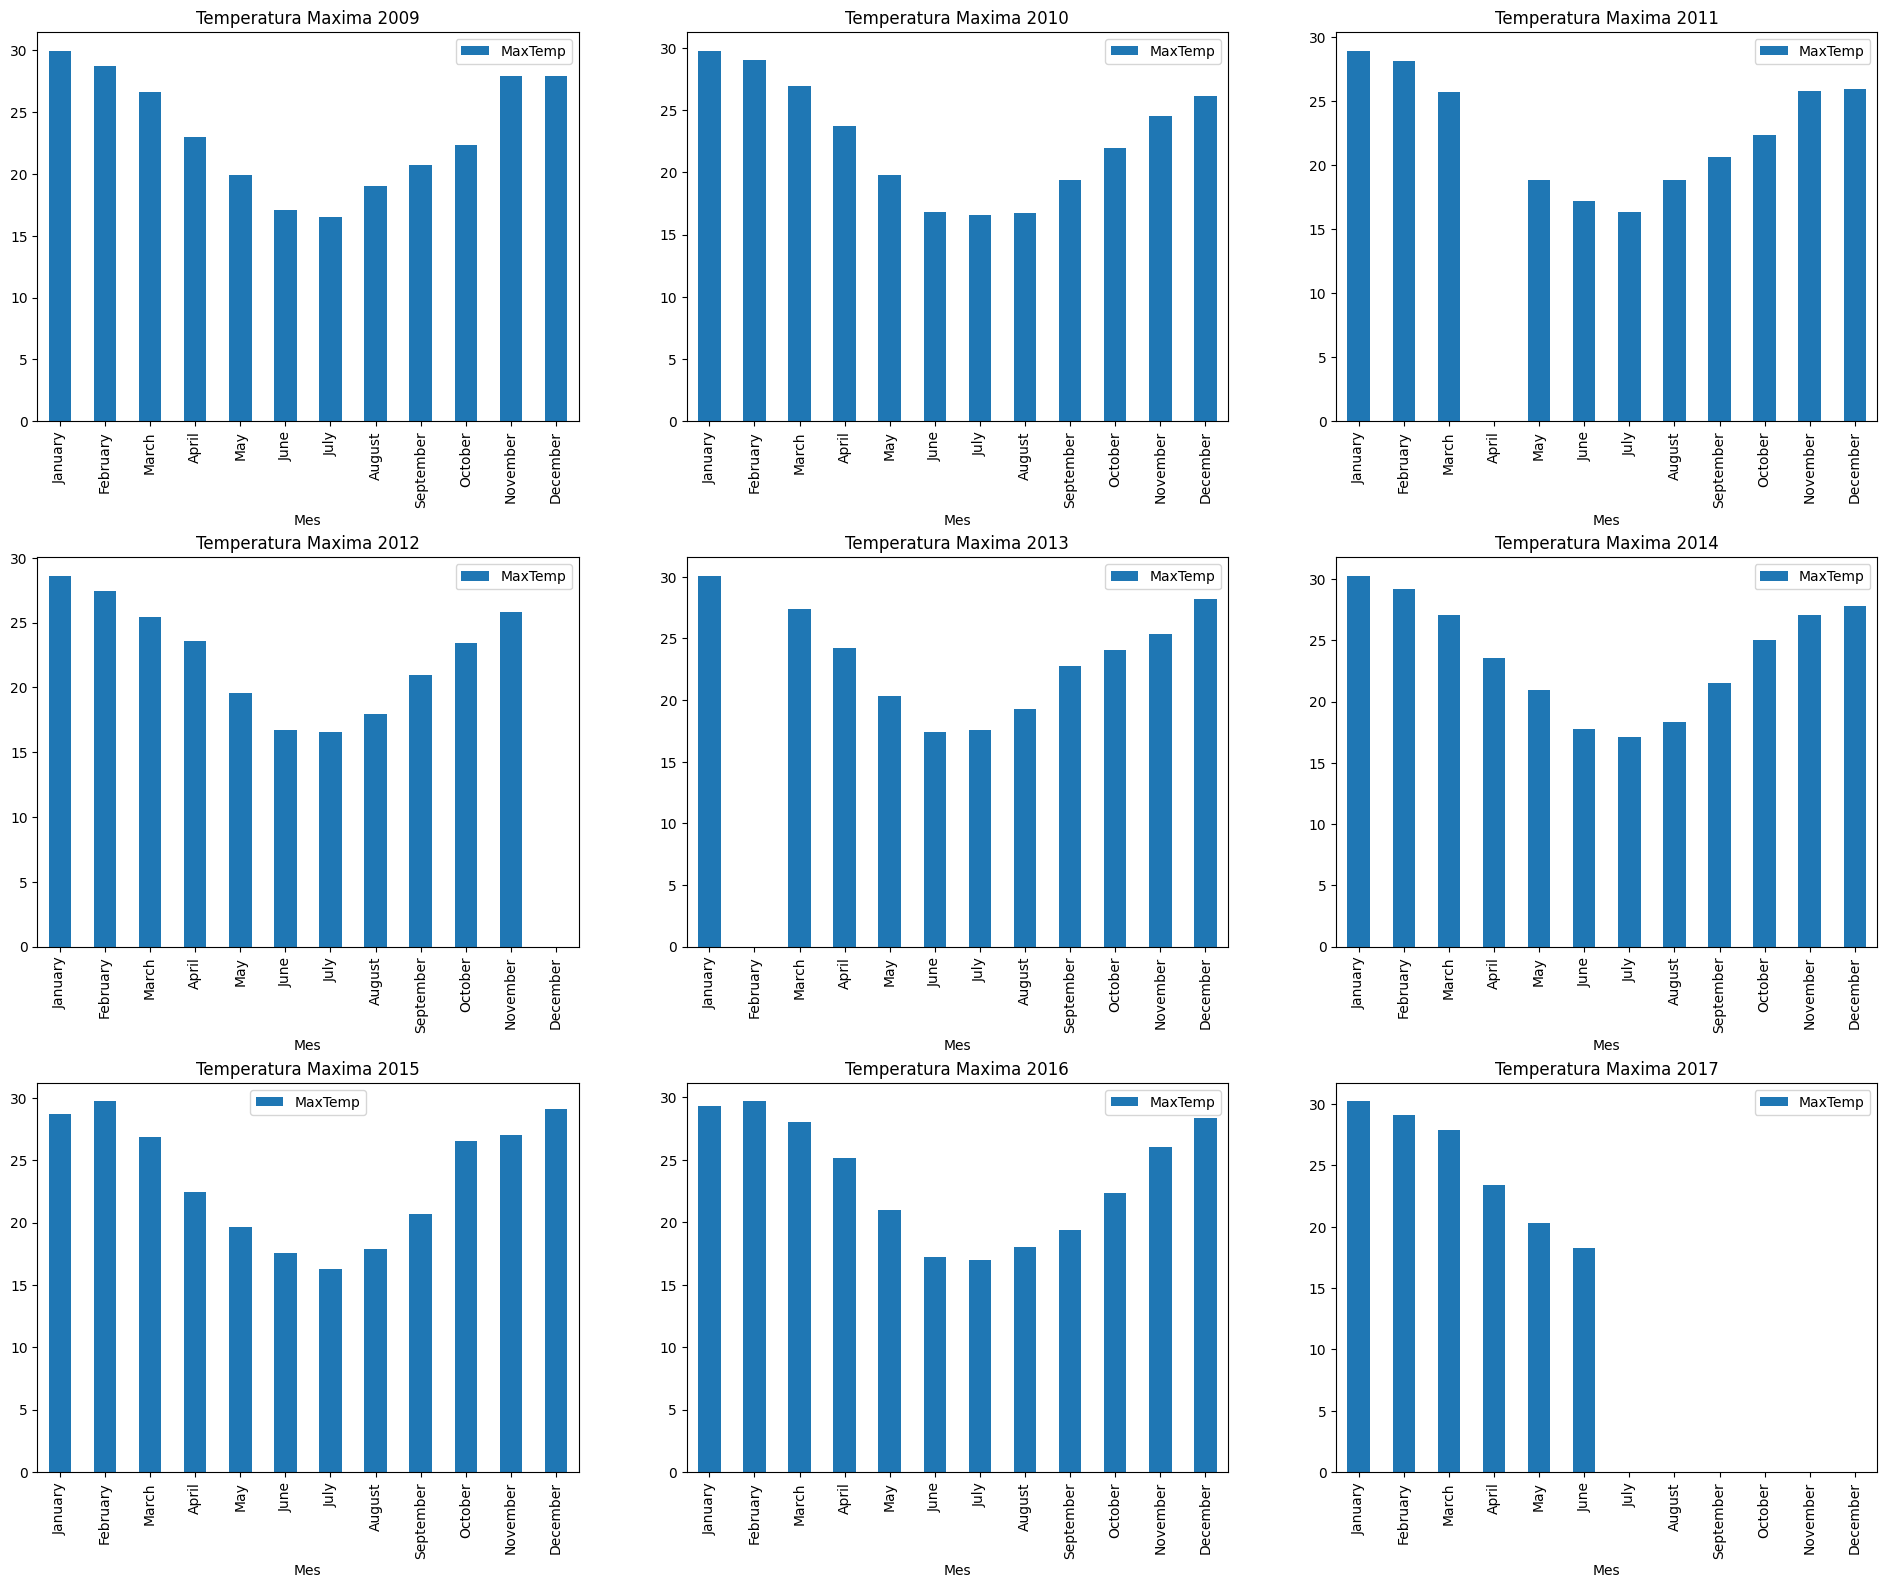

In [ ]:
orden = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
meses = pd.api.types.CategoricalDtype(categories=orden)
clima_data_graficos['Mes'] = clima_data_graficos['Mes'].astype(meses)

plt.subplot(331)
plt.title('Temperatura Maxima 2009')
filtro = clima_data_graficos['2009': '2009']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplot(332)
plt.title('Temperatura Maxima 2010')
filtro = clima_data_graficos['2010': '2010']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')

plt.legend()

plt.subplot(333)
plt.title('Temperatura Maxima 2011')
filtro = clima_data_graficos['2011': '2011']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplot(334)
plt.title('Temperatura Maxima 2012')
filtro = clima_data_graficos['2012': '2012']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplot(335)
plt.title('Temperatura Maxima 2013')
filtro = clima_data_graficos['2013': '2013']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplot(336)
plt.title('Temperatura Maxima 2014')
filtro = clima_data_graficos['2014': '2014']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplot(337)
plt.title('Temperatura Maxima 2015')
filtro = clima_data_graficos['2015': '2015']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplot(338)
plt.title('Temperatura Maxima 2016')
filtro = clima_data_graficos['2016': '2016']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplot(339)
plt.title('Temperatura Maxima 2017')
filtro = clima_data_graficos['2017': '2017']
x_values = filtro.groupby('Mes')
y_values  = x_values['MaxTemp'].mean()

y_values.plot(kind='bar')
plt.legend()

plt.subplots_adjust(left=0.125,
                    bottom=0.5,
                    right=3,
                    top=3.5,
                    wspace=0.2,
                    hspace=0.35)
plt.show




En el gráfico de barras podemos ver las distintas temperaturas máximas que se alcanzaron en todos los meses de ese año teniendo en mes de enero que es el mes en el que normalmente se alcanza la temperatura más alta en la gran mayoría de los años en algunas situaciones superando los 30 grados celsius, como también podemos ver que normalmente al comenzar el mes de abril empieza a caer considerablemente la temperatura debido a que en Australia ya se empieza acercar el invierno en el cual los meses junio y julio son los meses más fríos también podemos ver que en el mes de abril del año 2011, diciembre del año 2012 y febrero del año 2013 no tienen temperaturas registradas y como también en el año 2017 desde julio hacia delante que podemos decir que es hasta donde se registró información.

Respondiendo a la primera pregunta que nos planteamos las temperaturas han variado atrevés de los años de una manera minúscula.

<function matplotlib.pyplot.show(close=None, block=None)>

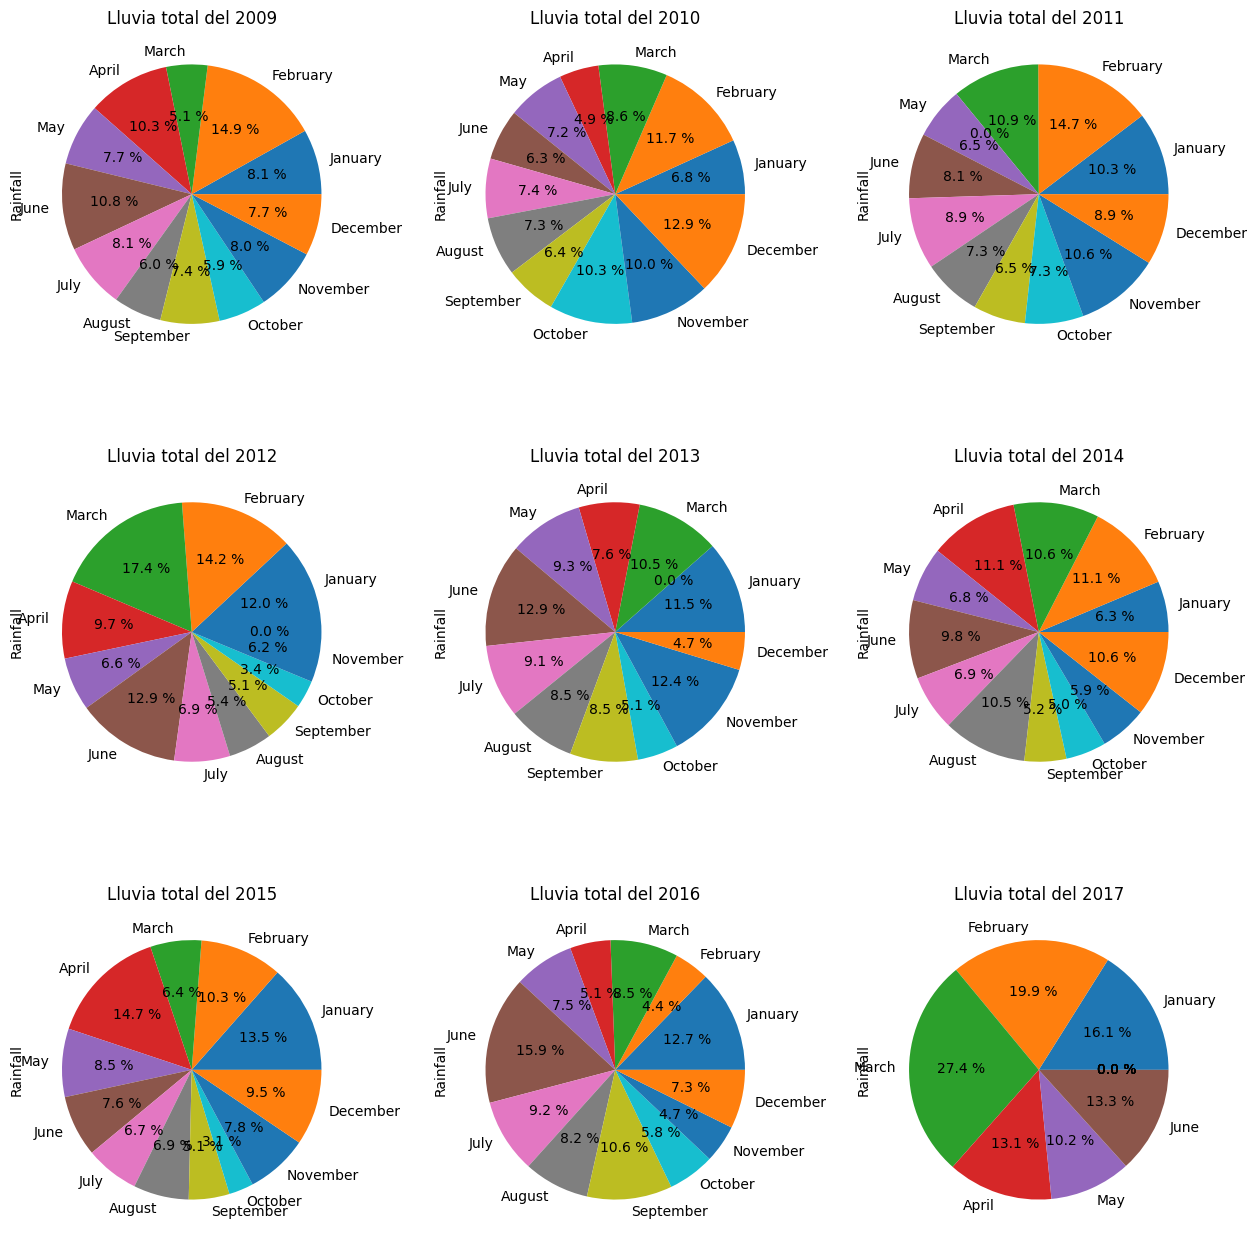

In [ ]:

plt.subplot(331)
plt.title('Lluvia total del 2009')
filtro = clima_data_graficos['2009': '2009']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")


plt.subplot(332)
plt.title('Lluvia total del 2010')
filtro = clima_data_graficos['2010': '2010']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")



plt.subplot(333)
plt.title('Lluvia total del 2011')
filtro = clima_data_graficos['2011': '2011']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")


plt.subplot(334)
plt.title('Lluvia total del 2012')
filtro = clima_data_graficos['2012': '2012']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")


plt.subplot(335)
plt.title('Lluvia total del 2013')
filtro = clima_data_graficos['2013': '2013']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")


plt.subplot(336)
plt.title('Lluvia total del 2014')
filtro = clima_data_graficos['2014': '2014']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")


plt.subplot(337)
plt.title('Lluvia total del 2015')
filtro = clima_data_graficos['2015': '2015']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")

plt.subplot(338)
plt.title('Lluvia total del 2016')
filtro = clima_data_graficos['2016': '2016']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie', autopct="%0.1f %%")


plt.subplot(339)
plt.title('Lluvia total del 2017')
filtro = clima_data_graficos['2017': '2017']
x_values = filtro.groupby('Mes')
y_values  = x_values['Rainfall'].mean()

y_values.plot(kind='pie',autopct="%0.1f %%")

plt.subplots_adjust(left=0.125,
                    bottom=0.5,
                    right=2,
                    top=3,
                    wspace=0.2,
                    hspace=0.35)
plt.show

En el gráfico de torta podemos ver las lluvias que se registraron en los 12 meses desde el año 2009 al 2017 podemos decir que comúnmente febrero es el mes que registra un mayor porcentaje de lluvia a lo largo de estos años de registros y teniendo a octubre comúnmente el mes que tiene menor porcentaje de lluvia a lo largo de los años, también podemos apreciar que el mes de abril del año 2011, diciembre del año 2012 y febrero del año 2013 no tienen lluvias registradas y como también en el año 2017 desde julio hacia delante que podemos decir que es hasta donde se registró información.



Para responder la tercera pregunta utilizamos los 2 gráficos anteriormente vistos y hemos llegado a la conclusión que en uno de los meses con mayor temperatura es uno de los meses que tiene mayor porcentaje de lluvia, esto se provoca porque entre noviembre y marzo en Australia es la temporada Húmeda y de abril a octubre es la temporada seca, esto se puede comprobar con los datos anteriormente vistos.

#Data Preparation

Revisión de nulos

In [ ]:
clima_data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Anio                 0
Mes                  0
dtype: int64

Como podemos observar la data se encuentra con bastantes valores nulos y en algunas columnas estos valores nulos son más del 40% de la data así que vamos a tratar los nulos con la manera de los "Vecinos" y explicaremos por qué vamos a usar este método


Usaremos el método de los vecinos porque según la información entregada los datos se encuentran registrados mediante provincias de Australia, eso significa que su clima varía dependiendo si se encuentra al norte, sur, este u oeste, esto provoca que cada media y moda se base por región y no se puede aplicar una moda a toda la data, ya que los datos serían inconsistentes



El método de los vecinos remplaza los datos nulos dependiendo de las características de los datos, para comprobar que este método es la mejor opción para remplazar los datos haremos 2 gráficos los cuales estarán centrados en las variables con más nulos del dataframe, el primer gráfico será de la data actual sin limpiar y el segundo será con la data con el método ya aplicado y compararemos.

In [ ]:
clima_data_numerico = clima_data.select_dtypes(include=['float64'])
clima_data_object = clima_data.select_dtypes(exclude=['float64'])
clima_data_object

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Anio,Mes
0,2008-12-01,Albury,W,W,WNW,No,No,2008,December
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,2008,December
2,2008-12-03,Albury,WSW,W,WSW,No,No,2008,December
3,2008-12-04,Albury,NE,SE,E,No,No,2008,December
4,2008-12-05,Albury,W,ENE,NW,No,No,2008,December
...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,E,ESE,E,No,No,2017,June
142189,2017-06-21,Uluru,E,SE,ENE,No,No,2017,June
142190,2017-06-22,Uluru,NNW,SE,N,No,No,2017,June
142191,2017-06-23,Uluru,N,SE,WNW,No,No,2017,June


Para poder remplazar los datos nulos solo necesitamos la data numérica, así que dividimos la data en 2 y después de aplicar el remplazo de nulos las uniremos nuevamente con un merge, no necesitamos una variable que conecte los 2 dataframes, ya que se encuentran en un orden paralelo, o sea que la posición 1 del primer dataframe es la misma que la del segundo.

Aplicando método de los vecinos

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=10)
neighbors = knn.fit_transform(clima_data_numerico)
columnas = clima_data_numerico.columns
clima_data_vecinos = pd.DataFrame(neighbors, columns=columnas)
clima_data_vecinos

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,5.40,9.52,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,3.8,16.9,21.8,0.0
1,7.4,25.1,0.0,7.16,10.58,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.1,1.5,17.2,24.3,0.0
2,12.9,25.7,0.0,5.78,10.69,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.1,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,8.04,10.94,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,2.1,1.5,18.1,26.5,1.0
4,17.5,32.3,1.0,6.26,9.80,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.67,10.20,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.3,0.8,9.4,20.9,0.0
142189,2.8,23.4,0.0,4.82,9.47,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,2.0,3.0,10.1,22.4,0.0
142190,3.6,25.3,0.0,5.18,9.11,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.8,1.9,10.9,24.5,0.0
142191,5.4,26.9,0.0,5.80,10.06,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,2.3,2.7,12.5,26.1,0.0


En el codigo anterior se aplico el metodo de los vecinos el cual usa la libreria Sklearn para buscar los datos parecidos en un rango de 10 variables, despues se entrena la data para encontrar los patrones y poder remplazar los datos de manera correcta, al final de todo este proceso se crea un nuevo dataframe donde el metodo ya fue aplicado

In [ ]:
clima_data_Nonulls = pd.concat([clima_data_object, clima_data_vecinos], axis=1)
clima_data_Nonulls


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Anio,Mes,MinTemp,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,2008-12-01,Albury,W,W,WNW,No,No,2008,December,13.4,...,24.0,71.0,22.0,1007.7,1007.1,8.0,3.8,16.9,21.8,0.0
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,2008,December,7.4,...,22.0,44.0,25.0,1010.6,1007.8,1.1,1.5,17.2,24.3,0.0
2,2008-12-03,Albury,WSW,W,WSW,No,No,2008,December,12.9,...,26.0,38.0,30.0,1007.6,1008.7,1.1,2.0,21.0,23.2,0.0
3,2008-12-04,Albury,NE,SE,E,No,No,2008,December,9.2,...,9.0,45.0,16.0,1017.6,1012.8,2.1,1.5,18.1,26.5,1.0
4,2008-12-05,Albury,W,ENE,NW,No,No,2008,December,17.5,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,E,ESE,E,No,No,2017,June,3.5,...,13.0,59.0,27.0,1024.7,1021.2,0.3,0.8,9.4,20.9,0.0
142189,2017-06-21,Uluru,E,SE,ENE,No,No,2017,June,2.8,...,11.0,51.0,24.0,1024.6,1020.3,2.0,3.0,10.1,22.4,0.0
142190,2017-06-22,Uluru,NNW,SE,N,No,No,2017,June,3.6,...,9.0,56.0,21.0,1023.5,1019.1,0.8,1.9,10.9,24.5,0.0
142191,2017-06-23,Uluru,N,SE,WNW,No,No,2017,June,5.4,...,9.0,53.0,24.0,1021.0,1016.8,2.3,2.7,12.5,26.1,0.0


Tras tener el dataframe con el método aplicado se debe unir a la data tipo Object, se usó el comando concat para unir ambos dataframes, esto se puede hacer, ya que el orden de los datos no varía entre data, ya que la fila 1 va con la fila 1 del otro dataframe.

Con esto tenemos la limpieza de la data completada.

Antes de seguir revisaremos si la media de las variables a cambiando comparado a su data original

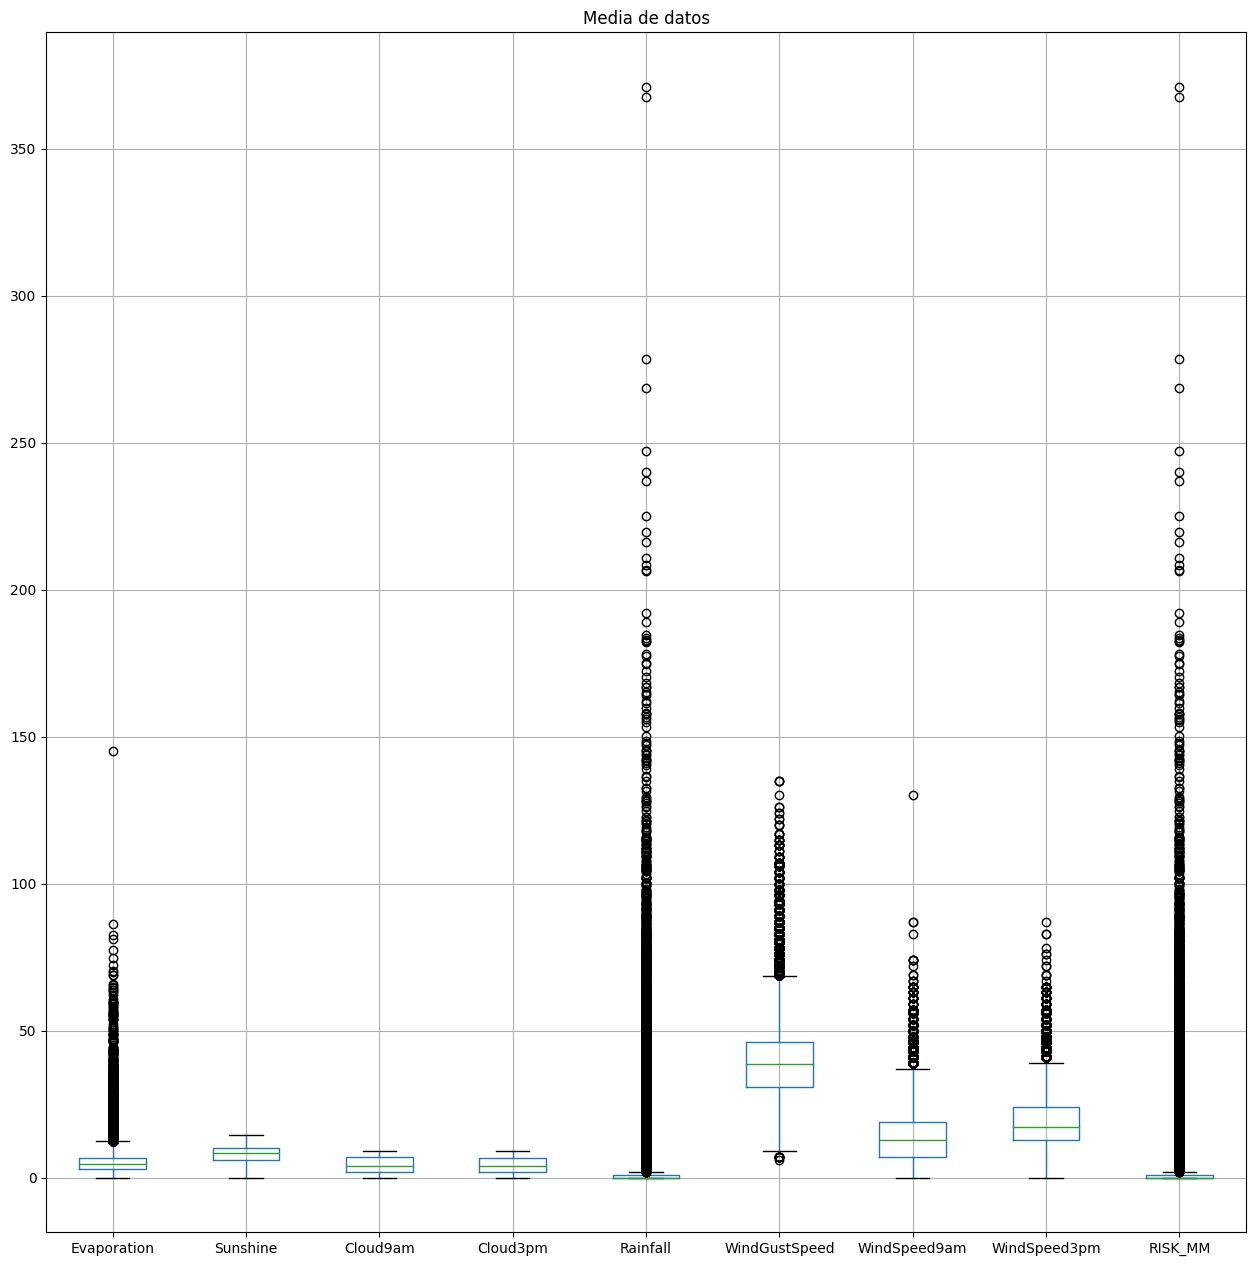

In [ ]:
fig, ax = plt.subplots()
boxplot = clima_data_Nonulls.boxplot(column=['Evaporation', 'Sunshine', 'Cloud9am','Cloud3pm', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RISK_MM'])
plt.title('Media de datos')
plt.subplots_adjust(left=0.125,
                    bottom=0.5,
                    right=2,
                    top=3,
                    wspace=0.2,
                    hspace=0.35)
plt.show()

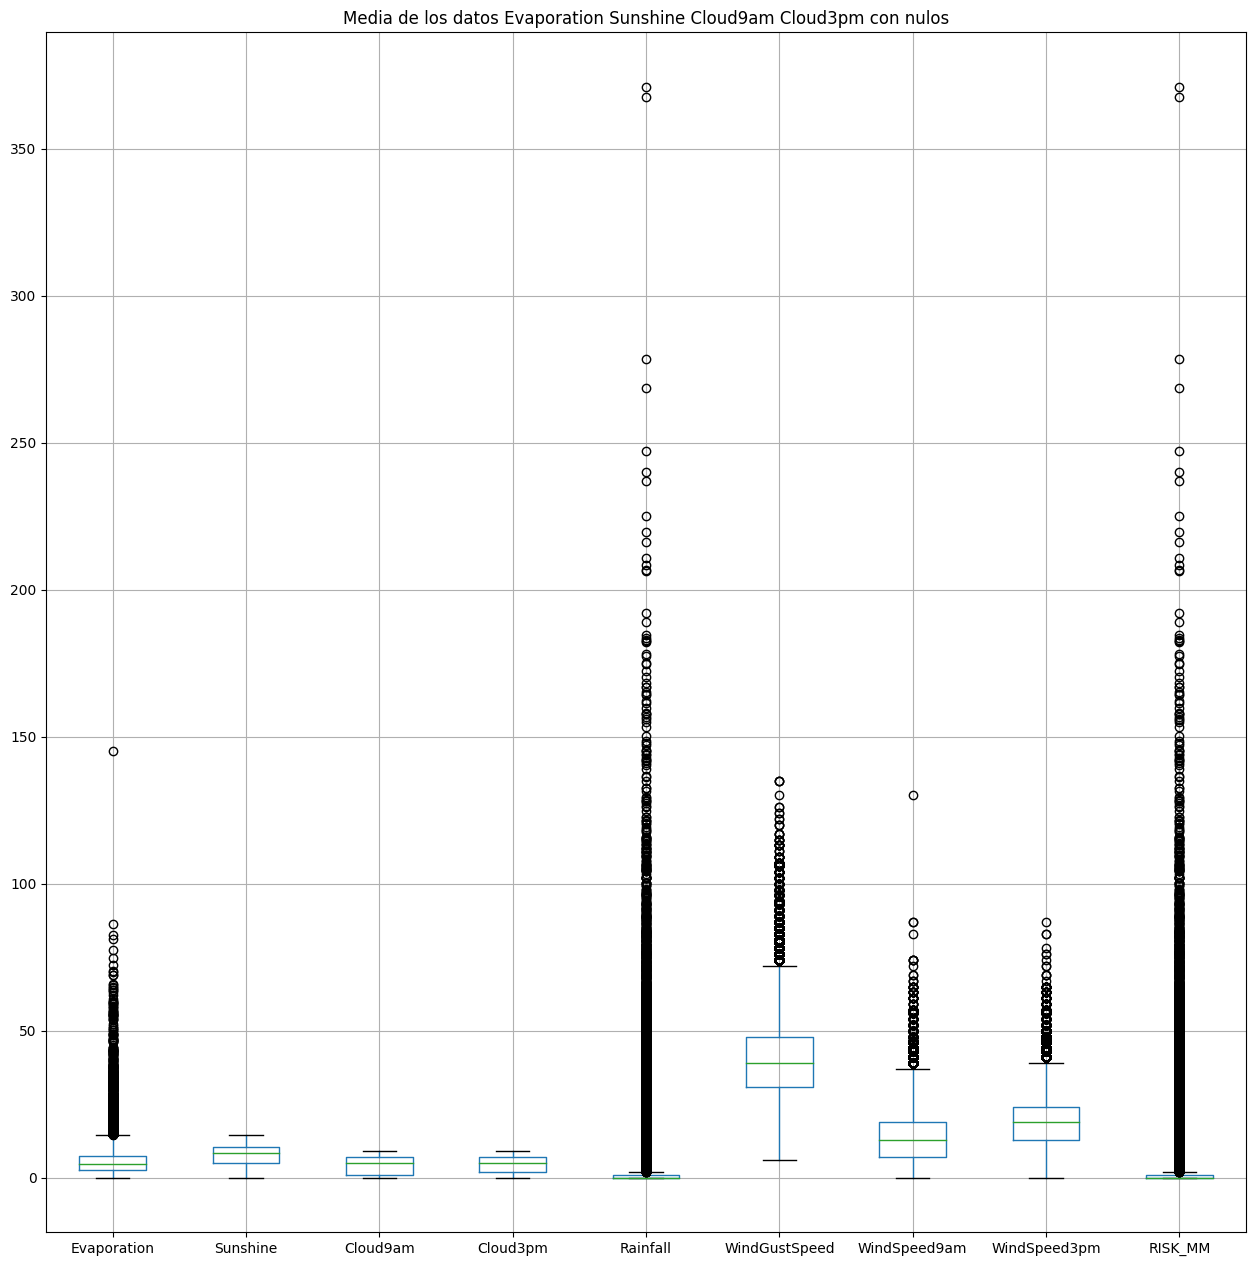

In [ ]:
fig, ax = plt.subplots()
boxplot = clima_data.boxplot(column=['Evaporation', 'Sunshine', 'Cloud9am','Cloud3pm', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RISK_MM'])
plt.title('Media de los datos Evaporation Sunshine Cloud9am Cloud3pm con nulos')

plt.subplots_adjust(left=0.125,
                    bottom=0.5,
                    right=2,
                    top=3,
                    wspace=0.2,
                    hspace=0.35)
plt.show()

Llegamos a la conclusión que nuestro método de remplazo fue la mejor opción, ya que altero los datos de una manera que no afecta a la distribución, a la media y a la moda.

In [ ]:
from sklearn.preprocessing import LabelEncoder
clima_data_codificada = clima_data_Nonulls.apply(LabelEncoder().fit_transform)

clima_data_codificada

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Anio,Mes,MinTemp,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,396,2,13,13,14,0,0,1,2,504,...,178,287,76,306,375,80,37,699,1050,0
1,397,2,14,6,15,0,0,1,2,192,...,159,71,104,492,429,11,14,717,1325,0
2,398,2,15,13,15,0,0,1,2,469,...,197,51,144,304,521,11,19,897,1218,0
3,399,2,4,9,0,0,0,1,2,252,...,29,75,36,1681,1178,21,14,761,1488,10
4,400,2,13,1,7,0,0,1,2,675,...,139,397,170,514,310,70,79,746,1727,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3430,41,0,2,0,0,0,10,6,119,...,69,171,119,3103,2865,3,7,344,931,0
142189,3431,41,0,9,1,0,0,10,6,111,...,49,110,94,3086,2678,20,29,365,1132,0
142190,3432,41,6,9,3,0,0,10,6,120,...,29,147,70,2861,2441,8,18,403,1341,0
142191,3433,41,3,9,14,0,0,10,6,152,...,29,123,94,2375,1986,23,26,471,1464,0


Utilizaremos labelEncoder para codificar los datos y así poder ser utilizados en la fase de modelado debido a que los datos categóricos no pueden ser utilizados en el modelo y usaremos la data codificada para poder ver la matriz de correlación y sacar los datos que más influyen a nuestra variable objetivo

In [ ]:
Matriz = clima_data_codificada.corr()
Matriz.style.background_gradient(cmap = 'YlOrRd')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Anio,Mes,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
Date,1.000000,0.021490,-0.024504,-0.011780,0.013579,-0.007994,-0.010947,0.993408,-0.000696,0.015161,0.037486,-0.013870,0.050696,0.031699,-0.021813,-0.011867,-0.031507,0.002573,-0.011914,0.033833,0.030190,0.011304,-0.002092,0.026047,0.036293,-0.013324
Location,0.021490,1.000000,-0.022076,-0.023564,-0.007895,0.001831,-0.003579,0.022265,-0.000750,-0.002119,-0.026688,-0.000405,0.042313,-0.005877,0.074723,0.088474,0.068581,-0.007867,0.011274,0.038158,0.046874,-0.007803,-0.013828,-0.001052,-0.032582,-0.000883
WindGustDir,-0.024504,-0.022076,1.000000,0.357879,0.561563,0.120754,0.054488,-0.029149,0.014970,-0.133765,-0.219448,0.100648,-0.106762,-0.089734,0.109212,-0.006262,0.067269,0.068634,0.076518,-0.087372,-0.005374,0.073428,0.077874,-0.166114,-0.232619,0.004166
WindDir9am,-0.011780,-0.023564,0.357879,1.000000,0.295262,0.138636,0.018436,-0.011871,0.005602,-0.121719,-0.244420,0.117110,-0.171344,-0.117027,-0.062481,-0.159564,-0.019763,0.194104,0.161798,0.045938,0.116991,0.105111,0.064682,-0.196393,-0.248325,-0.004083
WindDir3pm,0.013579,-0.007895,0.561563,0.295262,1.000000,0.117347,0.034435,0.009355,0.008353,-0.167657,-0.201236,0.100611,-0.083033,-0.066646,0.116156,0.026839,0.059800,0.049457,0.006633,-0.098843,-0.012999,0.050451,0.065875,-0.182148,-0.207197,-0.009145
RainToday,-0.007994,0.001831,0.120754,0.138636,0.117347,1.000000,0.309652,-0.009141,-0.006419,0.041991,-0.211760,0.760028,-0.211245,-0.364396,0.140560,0.089734,0.071423,0.346850,0.357257,-0.156253,-0.082271,0.337582,0.306486,-0.092160,-0.215067,0.260339
RainTomorrow,-0.010947,-0.003579,0.054488,0.018436,0.034435,0.309652,1.000000,-0.012039,-0.006753,0.069623,-0.156569,0.334146,-0.147118,-0.491716,0.224105,0.081327,0.076767,0.270107,0.450203,-0.236062,-0.214057,0.357255,0.424830,-0.030395,-0.188313,0.625002
Anio,0.993408,0.022265,-0.029149,-0.011871,0.009355,-0.009141,-0.012039,1.000000,-0.034580,0.038255,0.055899,-0.013107,0.057026,0.030684,-0.027790,-0.017482,-0.037547,0.012291,-0.010495,0.029025,0.026571,0.013642,-0.001867,0.041320,0.055968,-0.010585
Mes,-0.000696,-0.000750,0.014970,0.005602,0.008353,-0.006419,-0.006753,-0.034580,1.000000,-0.104590,-0.075275,-0.015288,-0.025368,0.001040,0.028935,0.028367,0.029528,-0.044497,-0.010230,0.049901,0.042487,-0.020917,-0.014404,-0.064207,-0.082481,-0.019800
MinTemp,0.015161,-0.002119,-0.133765,-0.121719,-0.167657,0.041991,0.069623,0.038255,-0.104590,1.000000,0.730150,0.084265,0.588496,0.116074,0.176260,0.167710,0.173509,-0.221820,0.012494,-0.468422,-0.473315,0.121226,0.056985,0.890239,0.701808,0.120854


Usaremos la Matriz de correlación para escoger las variables que mas afectan a nuestra variable objetivo, las variables que usaremos son las siguientes:

* RainToday
* Rainfall
* Risk_mm
* cloud3pm
* clod9am
* humidity3pm
* humifity9am
* sunshine
* evaporation
* WindGustSpeed

Son las que tienen mas relación con nuestro objetivo de forma posivita y negativa, todas las demas serán eliminadas de la data

In [ ]:
Clima = pd.DataFrame(columns=['RainToday', 'Rainfall', 'RISK_MM', 'Cloud3pm', 'Cloud9am', 'Humidity3pm', 'Humidity9am', 'Sunshine', 'Evaporation','WindGustSpeed', 'RainTomorrow'])
Clima['RainToday'] = clima_data_codificada['RainToday']
Clima['Rainfall'] = clima_data_codificada['Rainfall']
Clima['RISK_MM'] = clima_data_codificada['RISK_MM']
Clima['Cloud3pm'] = clima_data_codificada['Cloud3pm']
Clima['Cloud9am'] = clima_data_codificada['Cloud9am']
Clima['Humidity3pm'] = clima_data_codificada['Humidity3pm']
Clima['Humidity9am'] = clima_data_codificada['Humidity9am']
Clima['Sunshine'] = clima_data_codificada['Sunshine']
Clima['Evaporation'] = clima_data_codificada['Evaporation']
Clima['WindGustSpeed'] = clima_data_codificada['WindGustSpeed']
Clima['RainTomorrow'] = clima_data_codificada['RainTomorrow']
Clima


,RainToday,Rainfall,RISK_MM,Cloud3pm,Cloud9am,Humidity3pm,Humidity9am,Sunshine,Evaporation,WindGustSpeed,RainTomorrow
0,0,40,0,37,80,76,287,2440,1273,257,0
1,0,0,0,14,11,104,71,2738,1727,257,0
2,0,0,0,19,11,144,51,2769,1376,277,0
3,0,0,10,14,21,36,75,2840,1948,57,0
4,0,60,2,79,70,170,397,2522,1512,227,0
...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,7,3,119,171,2632,1065,127,0
142189,0,0,0,29,20,94,110,2427,1109,127,0
142190,0,0,0,18,8,70,147,2322,1210,37,0
142191,0,0,0,26,23,94,123,2592,1383,187,0


In [ ]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
data_escalada = rc.fit_transform(Clima)
pd.DataFrame(data_escalada)


,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.8,0.00,-0.044444,0.784314,-1.007092,0.035573,0.244881,0.181818,0.360000,0.0
1,0.0,0.0,0.00,-0.555556,-0.568627,-0.907801,-0.818182,0.488943,0.611742,0.360000,0.0
2,0.0,0.0,0.00,-0.444444,-0.568627,-0.765957,-0.897233,0.514333,0.279356,0.493333,0.0
3,0.0,0.0,1.25,-0.555556,-0.372549,-1.148936,-0.802372,0.572482,0.821023,-0.973333,0.0
4,0.0,1.2,0.25,0.888889,0.588235,-0.673759,0.470356,0.312039,0.408144,0.160000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142188,0.0,0.0,0.00,-0.711111,-0.725490,-0.854610,-0.422925,0.402129,-0.015152,-0.506667,0.0
142189,0.0,0.0,0.00,-0.222222,-0.392157,-0.943262,-0.664032,0.234234,0.026515,-0.506667,0.0
142190,0.0,0.0,0.00,-0.466667,-0.627451,-1.028369,-0.517787,0.148239,0.122159,-1.106667,0.0
142191,0.0,0.0,0.00,-0.288889,-0.333333,-0.943262,-0.612648,0.369369,0.285985,-0.106667,0.0


Al tener muchos datos atipicos en la data optamos por RobustScaler ya que trabaja en los Outlayers y los elimina al momento de estandarizarse con este metodo


Este estandarizador elimina la mediana y escala los rangos mediante los cuantiles, esto significa que toma intervalos según la distribucion de una variable aleatoria, esto se hace de forma independiente mediante el calculo de las estadisticas mas revelantes de la data, tambien guarda la mediana y el rango de intervalos para usarse en los datos posteriores.